##### Copyright 2024 Google LLC.

In [97]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [98]:
!pip install -q google-generativeai

### Import libraries

In [99]:
import google.generativeai as genai

In [100]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [101]:
import google.generativeai as genai

# List all available models
models = genai.list_models()

# Print model names and their supported methods
for model in models:
    print(f"Model: {model.name}")
    print(f"Supported Methods: {model.supported_generation_methods}\n")


Model: models/chat-bison-001
Supported Methods: ['generateMessage', 'countMessageTokens']

Model: models/text-bison-001
Supported Methods: ['generateText', 'countTextTokens', 'createTunedTextModel']

Model: models/embedding-gecko-001
Supported Methods: ['embedText', 'countTextTokens']

Model: models/gemini-1.0-pro-vision-latest
Supported Methods: ['generateContent', 'countTokens']

Model: models/gemini-pro-vision
Supported Methods: ['generateContent', 'countTokens']

Model: models/gemini-1.5-pro-latest
Supported Methods: ['generateContent', 'countTokens']

Model: models/gemini-1.5-pro-001
Supported Methods: ['generateContent', 'countTokens', 'createCachedContent']

Model: models/gemini-1.5-pro-002
Supported Methods: ['generateContent', 'countTokens', 'createCachedContent']

Model: models/gemini-1.5-pro
Supported Methods: ['generateContent', 'countTokens']

Model: models/gemini-1.5-flash-latest
Supported Methods: ['generateContent', 'countTokens']

Model: models/gemini-1.5-flash-001
Sup

In [102]:
import google.generativeai as genai

# List all available models
models = genai.list_models()

# Filter models that support fine-tuning
fine_tunable_models = [
    m for m in models if "createTunedModel" in m.supported_generation_methods
]

# Check if any fine-tunable models exist
if fine_tunable_models:
    print("Fine-Tunable Models:")
    for model in fine_tunable_models:
        print(f"{model.name} - {model.display_name}")
else:
    print("No fine-tunable models available.")


Fine-Tunable Models:
models/gemini-1.5-flash-001-tuning - Gemini 1.5 Flash 001 Tuning




```
# This is formatted as code
```

You can check your existing tuned models with the `genai.list_tuned_model` method.

In [103]:
for i, m in zip(range(10), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-9885
tunedModels/generate-num-1690
tunedModels/generate-num-16
tunedModels/generate-num-2826
tunedModels/generate-num-8724
tunedModels/generate-num-2830


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [104]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [105]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [106]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-2788',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 3, 3, 1, 43, 37, 879092, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 3, 3, 1, 43, 37, 879092, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)),
           reader_project_numbers=None)

In [107]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [108]:
operation.metadata

tuned_model: "tunedModels/generate-num-2788"
total_steps: 375

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [109]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/375 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [110]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

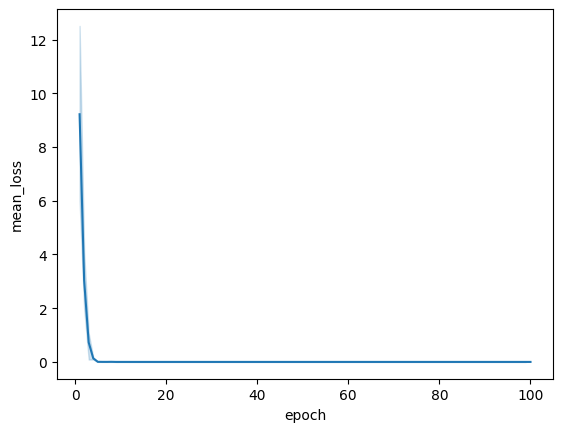

In [111]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [112]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [113]:
result = model.generate_content('55')
result.text

'56'

In [114]:
result = model.generate_content('123455')
result.text

'123456'

In [115]:
result = model.generate_content('four')
result.text

'five'

In [116]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [117]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [118]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

In [119]:
result = model.generate_content('9')
result.text

'10'

In [120]:
result = model.generate_content('Angka setelah 1232')
result.text

'1233'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [121]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [122]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [123]:
#genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [124]:

#try:
 # m = genai.get_tuned_model(f'tunedModels/{name}')
  #print(m)
#except Exception as e:
 # print(f"{type(e)}: {e}")

### Fine Tuning Model Indonesia

In [125]:
import random

nameIDTelemarketing = f'generate-num-{random.randint(0,10000)}'
operationIDTelemarketing = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': 'Saya ingin membeli paket internet 10GB yang ada saat ini, berapa harganya?',
             'output': 'Paket Internet yang tersedia saat ini adalah paket internet Murah Meriah 10GB dengan harga Rp50.000. Anda bisa membelinya melalui aplikasi MyTelkomsel atau dial *363#.',
        },{
             'text_input': 'Bagaimana cara cek sisa kuota internet saya?',
             'output': 'Anda bisa mengecek sisa kuota dengan dial *888# atau melalui aplikasi MyTelkomsel.',
        },{
             'text_input': 'Saya mengalami masalah dengan jaringan, sinyal sering hilang. Apa yang harus saya lakukan?',
             'output': 'Mohon coba restart ponsel Anda dan pastikan berada di area dengan jangkauan sinyal yang baik. Jika masalah berlanjut, hubungi layanan pelanggan 188.',
        },{
             'text_input': 'Apakah ada promo paket nelpon untuk bulan ini?',
             'output': 'Ya, kami memiliki promo paket nelpon murah ke semua operator. Silakan cek di aplikasi MyTelkomsel atau dial *888#.',
        },{
             'text_input': 'Saya ingin mengganti kartu SIM saya ke eSIM, bagaimana caranya?',
             'output': 'Anda bisa mengganti kartu SIM ke eSIM dengan mengunjungi GraPARI terdekat dan membawa kartu identitas Anda.',
        },{
             'text_input': 'Kenapa saya tidak bisa mengakses internet meskipun memiliki kuota?',
             'output': 'Pastikan pengaturan APN Anda sudah benar, lalu coba restart perangkat Anda. Jika masih bermasalah, hubungi layanan pelanggan.',
        },{
             'text_input': 'Berapa tarif SMS ke luar negeri dari Telkomsel?',
             'output': 'Tarif SMS ke luar negeri bervariasi tergantung negara tujuan. Anda bisa mengecek daftar tarif lengkap di website resmi Telkomsel.',
        },{
             'text_input': 'Saya ingin berbagi kuota internet ke teman, bagaimana caranya?',
             'output': 'Anda bisa menggunakan fitur GIFT di aplikasi MyTelkomsel atau melalui dial 5002#.',
        },{
             'text_input': 'Apakah bisa transfer pulsa ke operator lain?',
             'output': 'Saat ini transfer pulsa hanya bisa dilakukan ke sesama pengguna Telkomsel.',
        },{
             'text_input': 'Bagaimana cara berhenti langganan paket internet saya?',
             'output': 'Anda bisa berhenti langganan paket dengan mengirim SMS: ketik STOP(spasi)NAMA_PAKET kirim ke 3636 atau melalui aplikasi MyTelkomsel.',
        }
    ],
    id = nameIDTelemarketing,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)
print(f"Fine-tuning model `{nameIDTelemarketing}` is in progress...")


Fine-tuning model `generate-num-3064` is in progress...


In [126]:
modelIDTelemarketing = genai.get_tuned_model(f'tunedModels/{nameIDTelemarketing}')

modelIDTelemarketing

TunedModel(name='tunedModels/generate-num-3064',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 3, 3, 2, 2, 26, 669613, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 3, 3, 2, 2, 26, 669613, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)),
           reader_project_numbers=None)

In [127]:
modelIDTelemarketing.state

<State.CREATING: 1>

In [128]:
operationIDTelemarketing.metadata

tuned_model: "tunedModels/generate-num-3064"
total_steps: 250

In [129]:
import time

for status in operationIDTelemarketing.wait_bar():
  time.sleep(30)

  0%|          | 0/250 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

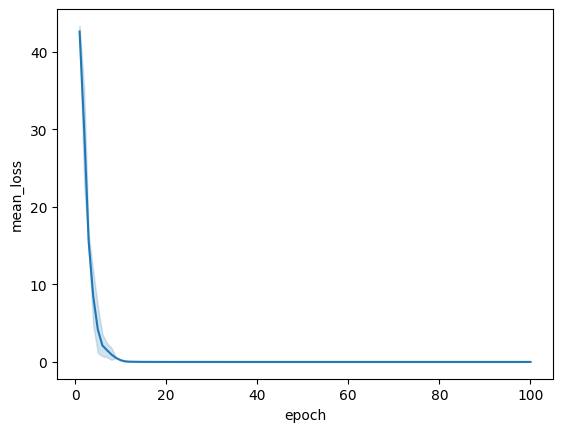

In [130]:
import pandas as pd
import seaborn as sns

modelIDTelemarketing = operationIDTelemarketing.result()

snapshots = pd.DataFrame(modelIDTelemarketing.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


In [131]:
modelIDTelemarketing = genai.GenerativeModel(model_name=f'tunedModels/{nameIDTelemarketing}')

In [132]:
result = modelIDTelemarketing.generate_content('apa rekomendasi paket internet yang bisa saya beli?')
result.text

'Kami rekomendasikan paket internet yang sesuai dengan kebutuhan Anda. Silakan ketik *363# atau melalui aplikasi MyTelkomsel.'

###Fine Tuning Model LLM AI Jawa

In [133]:
import random
import google.generativeai as genai

# Nama model fine-tuned
nameJawaTelemarketing = f'generate-num-{random.randint(0,10000)}'

# Membuat model fine-tuned dengan dataset Bahasa Jawa
operationJawaTelemarketing = genai.create_tuned_model(
    source_model="models/gemini-1.5-flash-001-tuning",  # Model yang mendukung fine-tuning
    training_data=[
        {
             'text_input': 'Aku pengin tuku paket internet 10GB sing ana saiki, pira regane?',
             'output': 'Paket Internet sing kasedhiya saiki yaiku paket internet Murah Meriah 10GB kanthi rega Rp50.000. Panjenengan saget tumbas liwat aplikasi MyTelkomsel utawi dial *363#.',
        },{
             'text_input': 'Kados pundi cara mriksa sisa kuota internet kula?',
             'output': 'Panjenengan saget mriksa kuota kanthi dial *888# utawi liwat aplikasi MyTelkomsel.',
        },{
             'text_input': 'Kula nemui masalah jaringan, sinyal sering ilang. Kados pundi solusine?',
             'output': 'Coba restart HP panjenengan lan priksa menawi wonten ing wilayah kanthi sinyal ingkang sae. Menawi tetep bermasalah, mangga hubungi 188.',
        },{
             'text_input': 'Nopo wonten promo paket nelpon wulan menika?',
             'output': 'Inggih, kita gadhah promo nelpon murah. Mangga cek ing aplikasi MyTelkomsel utawi dial *888#.',
        },{
             'text_input': 'Kados pundi cara ganti kartu SIM dados eSIM?',
             'output': 'Panjenengan saget mendhet eSIM ing GraPARI kanthi nyedhiyakake kartu identitas.',
        },{
             'text_input': 'Napa kulo boten saget akses internet sanajan tasih wonten kuota?',
             'output': 'Priksa setelan APN panjenengan lan coba restart piranti panjenengan. Menawi tasih bermasalah, mangga hubungi layanan pelanggan.',
        },{
             'text_input': 'Pinten tarif SMS dhateng luar negeri?',
             'output': 'Tarif SMS gumantung negara tujuan. Panjenengan saget priksa tarif ing situs resmi Telkomsel.',
        },{
             'text_input': 'Kados pundi cara mindhah pulsa dhateng kanca?',
             'output': 'Panjenengan saged nggunakake fitur GIFT ing aplikasi MyTelkomsel utawi dial 5002#.',
        },{
             'text_input': 'Napa aku boten saged transfer pulsa dhateng operator sanes?',
             'output': 'Transfer pulsa mung saget kangge pangguna Telkomsel kemawon.',
        },{
             'text_input': 'Kados pundi cara mandheg langganan paket internet?',
             'output': 'Panjenengan saged mandheg langganan paket kanthi ngirim SMS: ketik STOP(spasi)NAMA_PAKET lan kirim menyang 3636.',
        }
    ],
    id=nameJawaTelemarketing,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)

print(f"Fine-tuning model `{nameJawaTelemarketing}` is in progress...")


Fine-tuning model `generate-num-4772` is in progress...


In [134]:
modelJawaTelemarketing = genai.get_tuned_model(f'tunedModels/{nameIDTelemarketing}')

modelJawaTelemarketing

TunedModel(name='tunedModels/generate-num-3064',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2025, 3, 3, 2, 2, 26, 669613, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 3, 3, 2, 13, 8, 757976, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 3, 3, 2, 2, 28, 32899, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2025, 3, 3, 2, 13, 8, 757976, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4

In [135]:
modelJawaTelemarketing.state

<State.ACTIVE: 2>

In [136]:
operationJawaTelemarketing.metadata

tuned_model: "tunedModels/generate-num-4772"
total_steps: 250

In [137]:
import time

for status in operationJawaTelemarketing.wait_bar():
  time.sleep(30)

  0%|          | 0/250 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

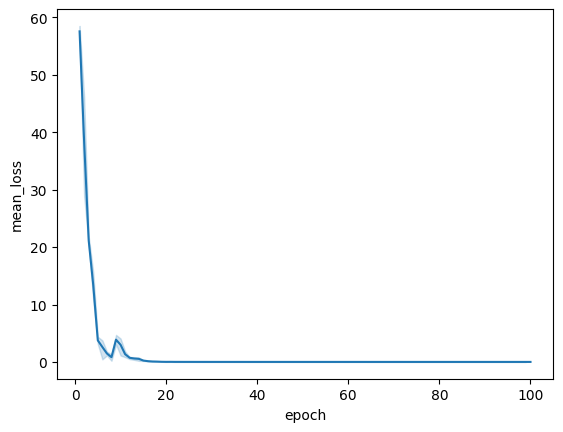

In [138]:
import pandas as pd
import seaborn as sns

modelJawaTelemarketing = operationJawaTelemarketing.result()

snapshots = pd.DataFrame(modelJawaTelemarketing.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


In [139]:
modelJawaTelemarketing = genai.GenerativeModel(model_name=f'tunedModels/{nameJawaTelemarketing}')

In [144]:
# Menggunakan model yang telah di-fine-tune dalam Bahasa Jawa
result = modelJawaTelemarketing.generate_content('Menapa rekomendasi paket internet ingkang saged kula tumbas?')
result.text


'Kula saget nyedhiyakake paket internet kanthi kuota lan harga ingkang kompetitif. Mangga cek ing aplikasi MyTelkomsel utawi dial *363#.'

In [142]:
import random
import google.generativeai as genai

# Nama model fine-tuned
nameSundaTelemarketing = f'generate-num-{random.randint(0,10000)}'

# Membuat model fine-tuned dengan dataset Bahasa Sunda
operationSundaTelemarketing = genai.create_tuned_model(
    source_model="models/gemini-1.5-flash-001-tuning",  # Model yang mendukung fine-tuning
    training_data=[
        {
             'text_input': 'Abdi hoyong mésér paket internet 10GB anu aya ayeuna, sabaraha hargana?',
             'output': 'Paket Internet anu sayogi ayeuna nyaéta paket internet Murah Meriah 10GB kalayan harga Rp50.000. Anjeun tiasa ngagaleuhna ngalangkungan aplikasi MyTelkomsel atanapi dial *363#.',
        },{
             'text_input': 'Kumaha cara mariksa sésa kuota internet abdi?',
             'output': 'Anjeun tiasa mariksa kuota ku dial *888# atanapi nganggo aplikasi MyTelkomsel.',
        },{
             'text_input': 'Abdi ngagaduhan masalah jaringan, sinyal sok leungit. Kumaha solusina?',
             'output': 'Coba restart HP sareng pastikeun anjeun aya di wewengkon anu sinyalna kuat. Upami masih bermasalah, telepon 188.',
        },{
             'text_input': 'Aya promo paket nelepon bulan ieu?',
             'output': 'Leres, aya promo nelepon murah. Mangga cek di aplikasi MyTelkomsel atanapi dial *888#.',
        },{
             'text_input': 'Kumaha cara ngaganti kartu SIM ka eSIM?',
             'output': 'Anjeun tiasa ngarobih ka eSIM di GraPARI ku nyayogikeun kartu identitas anjeun.',
        },{
             'text_input': 'Naha abdi henteu tiasa ngaksés internet sanajan gaduh kuota?',
             'output': 'Pastikeun setelan APN leres, teras coba restart alat anjeun. Upami masih bermasalah, telepon layanan palanggan.',
        },{
             'text_input': 'Sabaraha tarif SMS ka luar negeri?',
             'output': 'Tarif SMS gumantung kana nagara tujuan. Anjeun tiasa mariksa tarifna dina halaman wéb resmi Telkomsel.',
        },{
             'text_input': 'Kumaha cara ngirim pulsa ka rerencangan?',
             'output': 'Anjeun tiasa nganggo fitur GIFT dina aplikasi MyTelkomsel atanapi ku dial 5002#.',
        },{
             'text_input': 'Naha tiasa transfer pulsa ka operator sanés?',
             'output': 'Pikeun ayeuna, transfer pulsa ngan ukur tiasa ka sesama Telkomsel.',
        },{
             'text_input': 'Kumaha cara ngeureunkeun langganan paket internet?',
             'output': 'Anjeun tiasa ngeureunkeun langganan ku SMS: ketik STOP(spasi)NAMA_PAKET kirim ka 3636 atanapi via aplikasi MyTelkomsel.',
        }
    ],
    id=nameSundaTelemarketing,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)

print(f"Fine-tuning model `{nameSundaTelemarketing}` is in progress...")


Fine-tuning model `generate-num-1657` is in progress...


In [145]:
modelSundaTelemarketing = genai.get_tuned_model(f'tunedModels/{nameSundaTelemarketing}')


In [146]:
modelSundaTelemarketing

TunedModel(name='tunedModels/generate-num-1657',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 3, 3, 3, 36, 25, 100885, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 3, 3, 3, 38, 29, 564152, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 3, 3, 3, 36, 26, 335138, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                 

In [147]:
modelSundaTelemarketing.state

<State.CREATING: 1>

In [148]:
operationSundaTelemarketing.metadata

tuned_model: "tunedModels/generate-num-1657"
total_steps: 250

In [149]:
import time

# Menunggu proses fine-tuning selesai
for status in operationSundaTelemarketing.wait_bar():
    time.sleep(30)



  0%|          | 0/250 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

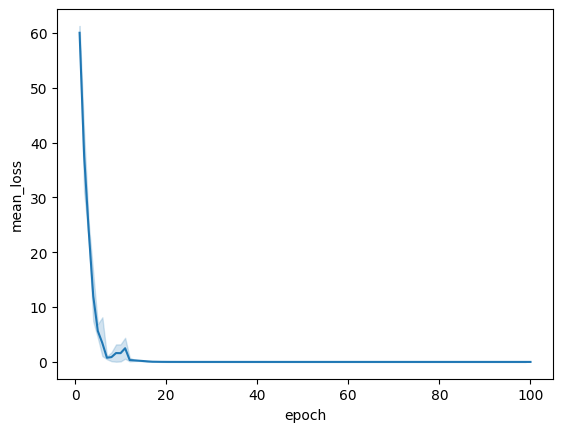

In [150]:
import pandas as pd
import seaborn as sns
# Mendapatkan hasil fine-tuning
modelSundaTelemarketing = operationSundaTelemarketing.result()
# Menyimpan snapshot hasil pelatihan
snapshots = pd.DataFrame(modelSundaTelemarketing.tuning_task.snapshots)

# Membuat grafik loss selama pelatihan
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')

In [154]:
# Menggunakan model yang telah di-fine-tune
modelSundaTelemarketing = genai.GenerativeModel(model_name=f'tunedModels/{nameSundaTelemarketing}')

In [156]:
# Menguji model dengan input dalam Bahasa Sunda
result = modelSundaTelemarketing.generate_content('Naon rekomendasi paket internet anu tiasa abdi mésér?')
result.text



'Simkuring nyayogikeun beraneka pilihan paket kuota. Anjeun tiasa mésér kuota tambahan dina aplikasi MyTelkomsel atanapi dial *363#.'